# 2장. 서울시 범죄 현황 분석

## 2-2 pandas를 이용하여 데이터 정리하기

In [1]:
import numpy as np
import pandas as pd

In [2]:
crime_anal_police = pd.read_csv('./data/02. crime_in_Seoul.csv', thousands=',',encoding='euc-kr')
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861


데이터를 읽어왔더니 관서별로 살인 강도 강간 절도 폭력이라는 5대 범죄에 대해 발생 건수와 검거 건수를 가지고 있다  
우리는 강남 2구가 안전한지를 확인하고 싶은데 데이터가 관서별로 되어 있다  
이 경철서 목록을 소속 구별로 변경하고 싶다. 그러기 위해서는 먼저 경찰서 이름으로 구 정보를 알아야 한다  
양이 많지 않으니 직접 입력해도 되지만 프로그램으로 접근해보자

## Section 2.3 ~ 2.4 지도 정보를 얻을 수 있는 Google Maps

위치에 대한 검색 결과 중 주소와 위도, 경도 정보를 제공하는 서비스를 구글에서 제공한다  
Google Maps API이다.  http://developers.google.com/maps/?hl-ko 로 접속해서 API에 접근한다  
=> 위의 방법은 현재 유료로 바뀌었으므로 이미 정리된 데이터를 사용한다

In [3]:
########## Data Load
crime_anal_raw = pd.read_csv('./data/02. crime_in_Seoul_include_gu_name.csv', encoding='utf-8')
crime_anal_raw.head()

,Unnamed: 0,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


## 2-5 pandas의 pivot_table학습하기

pandas 관련 많은 예제가 있는 github를 운영하고 있는 chris1610님이 공개한 데이터와 예제를 인용  
주소 : http://github.com/chris1610/pbpython/tree/master/data

In [6]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_excel("./data/02. sales-funnel.xlsx")
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


위 데이터에서 Name 항목으로만 정렬할 때 **pivot_table**을 사용한다  
그럼 아래와 같이 Name 컬럼이 index가 되고 특별히 지정하지 않았다면 숫자형 데이터 컬럼들만 남게 된다  
그리고 중복된 Name의 항목은 하나로 합쳐지고 **value들은 평균**을 갖게 된다

In [9]:
pd.pivot_table(df, index=["Name"])

,Account,Price,Quantity
Name,,,
Barton LLC,740150,35000,1.000000
"Fritsch, Russel and Anderson",737550,35000,1.000000
Herman LLC,141962,65000,2.000000
Jerde-Hilpert,412290,5000,2.000000
"Kassulke, Ondricka and Metz",307599,7000,3.000000
Keeling LLC,688981,100000,5.000000
Kiehn-Spinka,146832,65000,2.000000
Koepp Ltd,729833,35000,2.000000
Kulas Inc,218895,25000,1.500000


index를 여러 개 지정할 수도 있다

In [10]:
pd.pivot_table(df, index=["Name","Rep","Manager"])

,,,Account,Price,Quantity
Name,Rep,Manager,,,
Barton LLC,John Smith,Debra Henley,740150,35000,1.000000
"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,737550,35000,1.000000
Herman LLC,Cedric Moss,Fred Anderson,141962,65000,2.000000
Jerde-Hilpert,John Smith,Debra Henley,412290,5000,2.000000
"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,307599,7000,3.000000
Keeling LLC,Wendy Yule,Fred Anderson,688981,100000,5.000000
Kiehn-Spinka,Daniel Hilton,Debra Henley,146832,65000,2.000000
Koepp Ltd,Wendy Yule,Fred Anderson,729833,35000,2.000000
Kulas Inc,Daniel Hilton,Debra Henley,218895,25000,1.500000


특정 value만 지정해서 나타나도록 할 수도 있다  

In [12]:
pd.pivot_table(df, index=["Manager","Rep"],values=["Price"])

Price
Manager       Rep                        
Debra Henley  Craig Booker   20000.000000
              Daniel Hilton  38333.333333
              John Smith     20000.000000
Fred Anderson Cedric Moss    27500.000000
              Wendy Yule     44250.000000

value를 pivot_table로 합친 경우 평균치가 기본이 된다  
여기에 합계를 사용하려면 aggfunc 옵션을 사용해서 np.sum을 사용하면 된다

In [13]:
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],aggfunc=np.sum)

Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

이번에는 조금 더 나아가서 옵션들을 적극적으로 활용해보자  
index, value 모두 지정하고, np.sum과 np.mean를 모두 표시하도록 하고, 그 과정에서 빈 칸이 나타나면 NaN으로 두지 말고  
fill_value 옵션을 이용해서 0으로 채운다   
여기서 margins는 분석한 결과를 오른쪽과 아래에 붙일지 여부를 지정해주는 옵션이다

In [14]:
pd.pivot_table(df,index=["Manager","Rep","Product"],
               values=["Price","Quantity"],
               aggfunc=[np.sum,np.mean],fill_value=0,margins=True)

sum            mean          
                                          Price Quantity  Price  Quantity
Manager       Rep           Product                                      
Debra Henley  Craig Booker  CPU           65000        2  32500  1.000000
                            Maintenance    5000        2   5000  2.000000
                            Software      10000        1  10000  1.000000
              Daniel Hilton CPU          105000        4  52500  2.000000
                            Software      10000        1  10000  1.000000
              John Smith    CPU           35000        1  35000  1.000000
                            Maintenance    5000        2   5000  2.000000
Fred Anderson Cedric Moss   CPU           95000        3  47500  1.500000
                            Maintenance    5000        1   5000  1.000000
                            Software      10000        1  10000  1.000000
              Wendy Yule    CPU          165000        7  82500  3.500000
                            Maintenance    7000        3   7000  3.000000
                            Monitor        5000        2   5000  2.000000
All                                      522000       30  30705  1.764706

pivot_table 자체는 큰 비중을 차지하지 않지만 어떤 상황에서 내가 원하는 것을 얻기 위해  
pivot_table을 떠올리지 못하고 그걸 여러 반복문과 조건문으로 처리하려고 하면 머리아프다   
구현하는 능력이 더 중요하지만 쓸 줄 아는 능력도 중요하다  
이제는 본론으로 돌아가서 데이터를 정리해보자

## 2-6 Pivot_table을 이용해서 데이터 정리하기

In [15]:
crime_anal_raw = pd.read_csv('./data/02. crime_in_Seoul_include_gu_name.csv', encoding = 'utf-8')
crime_anal_raw.head()

,Unnamed: 0,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


앞에서 배운 pivot_table을 이용해서 원 데이터를 관서별에서 구별로 바꾸면 다음과 같다

In [16]:
crime_anal_raw = pd.read_csv('./data/02. crime_in_Seoul_include_gu_name.csv', encoding = 'utf-8', index_col = 0)
crime_anal = pd.pivot_table(crime_anal_raw,index='구별',aggfunc=np.sum)
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
관악구,221,320,14,12,8,9,827,2706,2642,3298
광진구,220,240,26,14,4,4,1277,3026,2180,2625


추가로 각 범죄별 검거율을 계산하고, 검거 건수는 검거율로 대체할 수 있으니 삭제하자

In [18]:
crime_anal['강간검거율'] = crime_anal['강간 검거'] / crime_anal['강간 발생'] * 100
crime_anal['강도검거율'] = crime_anal['강도 검거'] / crime_anal['강도 발생'] * 100
crime_anal['살인검거율'] = crime_anal['살인 검거'] / crime_anal['살인 발생'] * 100
crime_anal['절도검거율'] = crime_anal['절도 검거'] / crime_anal['절도 발생'] * 100
crime_anal['폭력검거율'] = crime_anal['폭력 검거'] / crime_anal['폭력 발생'] * 100

del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['살인 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']

crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,185.714286,100.000000,42.200925,83.047619


그런데 위의 결과를 보면 검거율이 100을 넘는 숫자들이 포함되어 있다  
그 전에 발생한 범죄들에 대한 검거도 포함되다보니 그런 듯 하다  
현재 실제 분석이 아닌 학습 목적이므로 100이 넘는 숫자는 다 100으로 처리한다  

In [19]:
con_list = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']

for column in con_list:
    crime_anal.loc[crime_anal[column] > 100, column] = 100
    
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619


이제는 뒤에 '강간 발생'에 뒤에 붙은 발생이라는 단어를 삭제하자  
column 명 변경은 rename 명령으로 수행 가능하다

In [20]:
crime_anal.rename(columns = {'강간 발생':'강간',
                             '강도 발생':'강도',
                             '살인 발생':'살인',
                             '절도 발생':'절도',
                             '폭력 발생':'폭력'}, inplace=True)
crime_anal.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619


이제 서울시 구별 5대 범죄의 발생 건수와 검거율을 데이터로 갖게 되었다

## 2-7 데이터 표현을 위해 다듬기

현재까지 다듬은 데이터의 결과를 보게 되면 강도, 살인 사건은 두 자릿수인데 절도와 폭력은 네 자릿수이다  
모든 범죄 발생에 대해 같은 최댓값을 갖도록 '정규화(Normalization)'를 하자  
이렇게하면 추후 범죄 발생 건수를 종합적으로 시각화해서 비교할 때 편리할 것이다  
  
여기서 파이썬의 머신러닝에 관한 모듈로 유명한 scikit learn에 있는 전처리 도구의 최소값, 최대값을 이용해서 정규화시키는 함수를 사용한다

In [23]:
from sklearn import preprocessing

col = ['강간','강도','살인','절도','폭력']

x = crime_anal[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
crime_anal_norm = pd.DataFrame(x_scaled, columns=col,index=crime_anal.index)

col2 = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619


이제 1장에서 학습했던 결과인 01. CCTV_result를 읽어서 그 속에서 구별 인구수와 CCTV 개수를 가지고 오자  

In [25]:
result_CCTV = pd.read_csv('./data/01. CCTV_result.csv', encoding='utf-8', index_col='구별')
crime_anal_norm[['인구수','CCTV']] = result_CCTV[['인구수','소계']]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707


이번에는 발생 건수의 함을 '범죄'라는 항목으로 두고 이를 합한다  
만약 정규화를 하지 않았다면 몇 천건의 절도에 수십 건의 살인의 비중이 애매했겠지만 정규화를 통해 그 부분은 유리해졌다  

In [26]:
col = ['강간','강도','살인','절도','폭력']
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.472701
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.116551
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.494746
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.613667
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.034438


그리고 검거율도 통합한다

In [27]:
col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm['검거'] = np.sum(crime_anal_norm[col],axis=1)
crime_anal_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.472701,369.707384
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.116551,370.084431
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.494746,406.943540
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.613667,368.622261
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.034438,416.915211
구로구,0.515850,0.588235,0.500000,0.435169,0.359423,58.362989,73.333333,75.000000,38.072805,80.877951,447874.0,1561,2.398678,325.647079
금천구,0.141210,0.058824,0.083333,0.172426,0.134074,80.794702,100.000000,100.000000,56.668794,86.465433,255082.0,1015,0.589867,423.928929
노원구,0.273775,0.117647,0.666667,0.386589,0.292268,61.421320,100.000000,100.000000,36.525308,85.530665,569384.0,1265,1.736946,383.477292
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.000000,100.000000,44.967074,87.626093,348646.0,485,0.318627,432.593167


그 결과는 위와 같다  
그럼 이 결과를 어떻게 하면 효과적으로 인식할 수 있게 시각화할 수 있을까?  
앞에서와 같이 sorting해서 시각화하는 것은 효과적이지 않다  

## 2-7 좀 더 편리한 시각화 도구 - Seaborn

Seaborn이라는 단어의 시각화 도구가 있다  
Matplotlib와 함께 사용하는 것인데 정말 괜찮다  
해당 모듈이 없다면 pip install seaborn으로 설치하면 된다

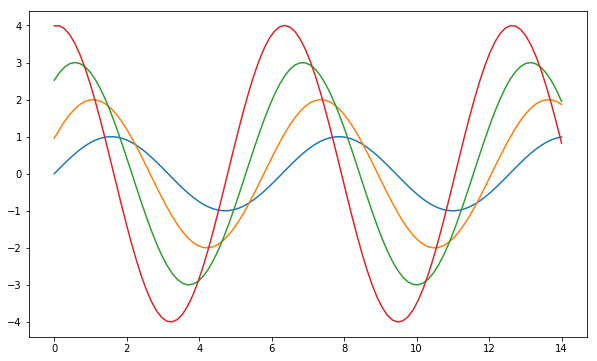

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

x = np.linspace(0,14,100)
y1 = np.sin(x)
y2 = 2 * np.sin(x + 0.5)
y3 = 3 * np.sin(x + 1.0)
y4 = 4 * np.sin(x + 1.5)

plt.figure(figsize=(10,6))
plt.plot(x,y1,x,y2,x,y3,x,y4)
plt.show()

간단하게 몇 개의 사인 함수를 그려보았다  
seaborn을 import할 때는 matplotlib도 같이 import되어 있어야 한다  
일단 기본인데 색감도 괜찮고 뭔가 이쁘다

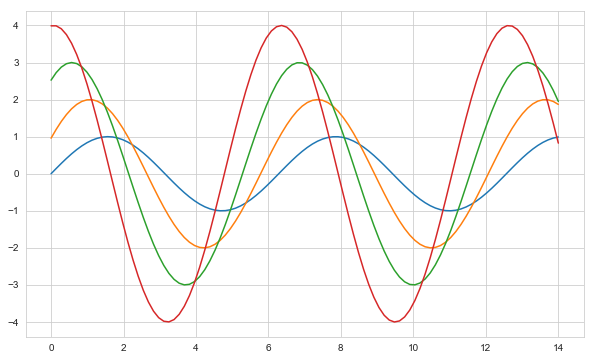

In [30]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
plt.plot(x,y1,x,y2,x,y3,x,y4)
plt.show()

또한 Seaborn은 연습할만한 데이터셋을 몇 개 가지고 있다  
아래는 Tips라는 데이터셋인데, 요일별 점심, 저녁, 흡연 여부와 식사 금액과 팁을 정리한 데이터이다  

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


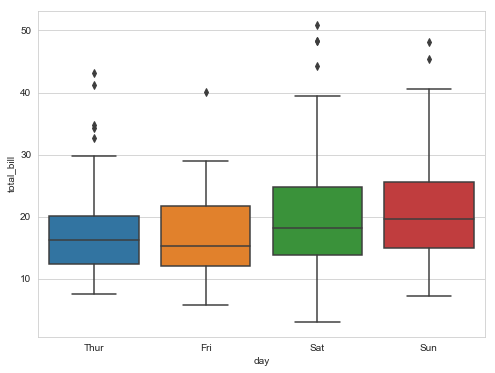

In [33]:
plt.figure(figsize=(8,6))
sns.boxplot(x="day",y="total_bill",data=tips)
plt.show()

이렇게 boxplot을 그리는데 x축은 요일, y축은 전체 금액을 그릴 수 있다  

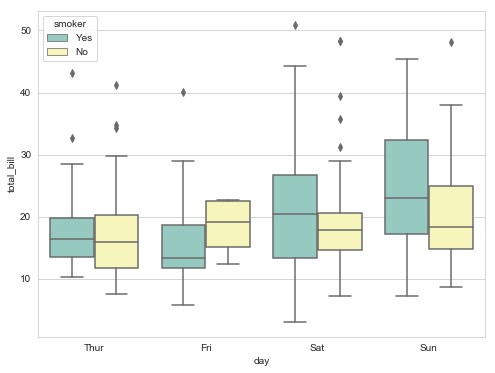

In [35]:
plt.figure(figsize=(8,6))
sns.boxplot(x="day",y="total_bill",hue="smoker",data=tips,palette="Set3")
plt.show()

여기서 끝이 아니라, 위에처럼 hue 라는 옵션을 이용해서 구분할 수 있다  
위의 코드 같은 경우는 흡연 여부로 구분한 것이다  
위의 데이터를 분석해보면 흡연자가 결제 금액의 범위가 큰 것을 알 수 있다   

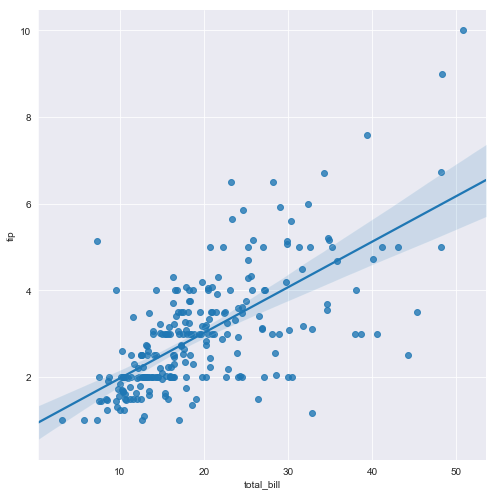

In [37]:
sns.set_style("darkgrid")
sns.lmplot(x="total_bill",y="tip",data=tips,height=7)
plt.show()

이번에는 darkgrid 스타일로하고 lmplot을 그려보았다  
데이터를 scatter처럼 뿌리고 직선을 regression한 그림도 같이 그려주고 유효범위도 ci로 잡아준다

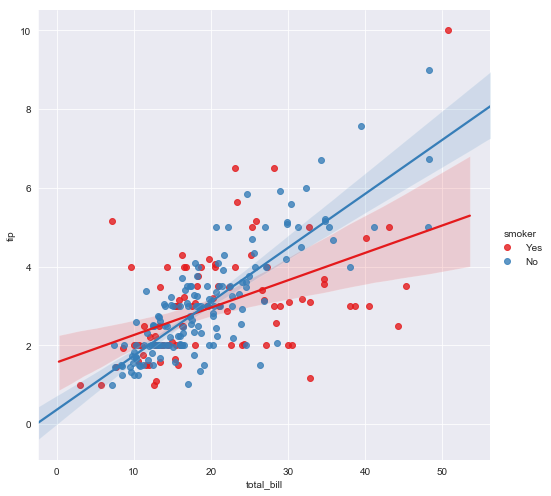

In [39]:
sns.lmplot(x="total_bill",y="tip",hue="smoker",data=tips,palette="Set1",height=7)
plt.show()

lmplot 역시 hue 옵션을 가질 수 있으며 미리 준비된 palette로 색상을 지정할 수 있다

In [40]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


이번에는 연도 및 월별 항공기 승객수를 기록한 데이터인 flights 데이터를 사용해보자

In [41]:
flights = flights.pivot("month","year","passengers")
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


pivot 기능으로 간편하게 월별, 연도별로 구분을 할 수가 있다  
앞에서 공부했다시피 pivot을 생각해낸다면 꽤 편리하게 유용한 결과를 얻을 수 있다  

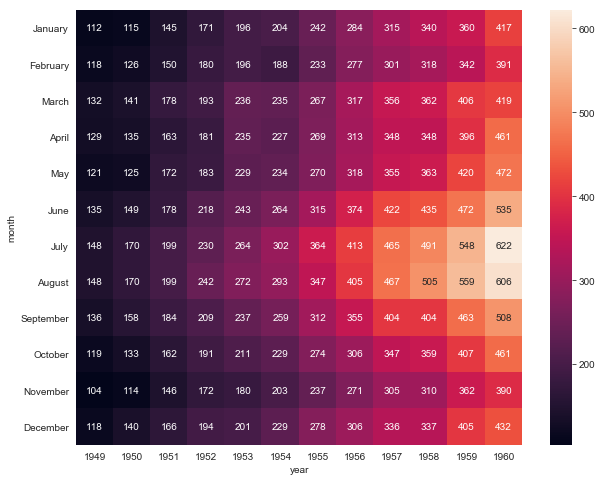

In [44]:
plt.figure(figsize=(10,8))
sns.heatmap(flights,annot=True,fmt="d")
plt.show()

heatmap이라는 도구를 이용하면 이런 종류의 데이터는 그 경향을 표현하기 좋다  

In [45]:
sns.set(style="ticks")
iris = sns.load_dataset("iris")
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


이번에는 머신러닝에서 중요하게 다뤄지는 아이리스 꽃데 대한 데이터를 가지고 와보자  
꽃잎, 꽃받침의 너비와 폭을 가지고 그 종을 구분할 수 있는지를 알아봐보자  

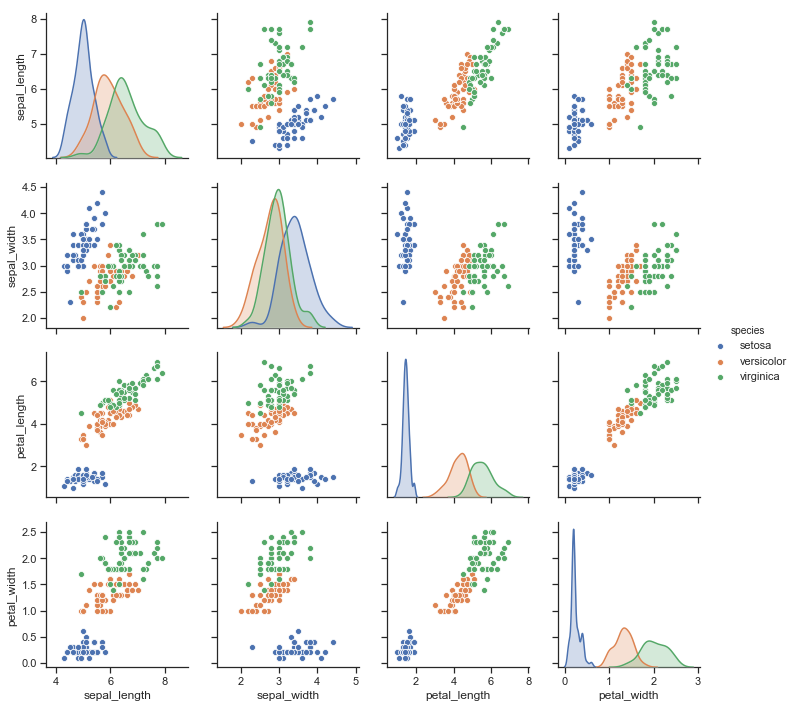

In [46]:
sns.pairplot(iris, hue="species")
plt.show()

여기서는 pairplot라는 정말 깔끔한 명령이 있다  
보는것과 같이 상당히 보기 좋게 그려준다

## 2-8 범죄 데이터 시각화하기

방금 학습한 시각화 도구인 Seaborn을 이용해서 성과를 얻어보자  

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import platform
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"

font_name = font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name)

일단 필요한 라이브러리 import와 한글 폰트 문제를 해결한다  
그리고 pairplot으로 강도, 살인, 폭력 간의 상관관계를 그래프로 그려보자

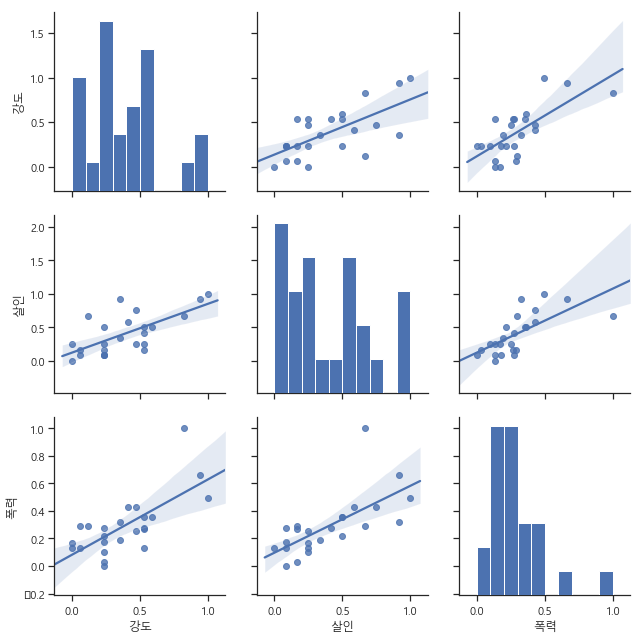

In [52]:
sns.pairplot(crime_anal_norm,vars=["강도","살인","폭력"],kind="reg",height=3)
plt.show()

강도와 폭력, 살인과 폭력, 강도와 살인 모두 양의 상관관계가 보인다

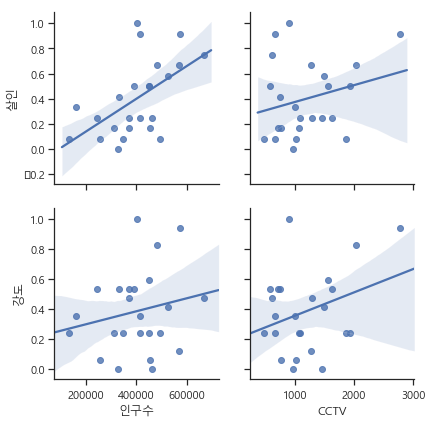

In [53]:
sns.pairplot(crime_anal_norm, x_vars=["인구수","CCTV"],
             y_vars=["살인","강도"],kind="reg",height=3)
plt.show()

인구수와 CCTV 개수, 그리고 살인과 강도에 대해 조사해봤다  
전체적인 상관계수는 CCTV 개수와 살인의 관계가 낮더라도 CCTV가 없을 때 살인이 많이 일어나는 구간이 있다  
즉 CCTV 개수를 기준으로 좌측면에 살인과 강도의 높은 수를 높은 수를 갖는 데이터가 보인다  

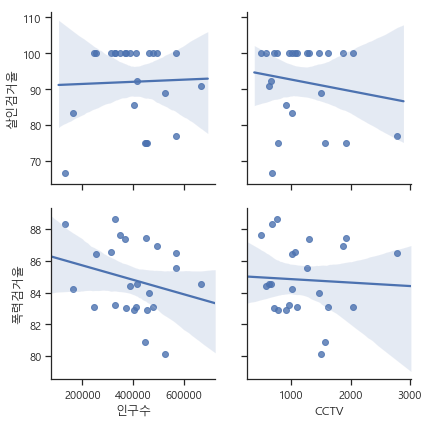

In [54]:
sns.pairplot(crime_anal_norm,
             x_vars=["인구수","CCTV"],
             y_vars=["살인검거율","폭력검거율"],kind="reg",height=3)
plt.show()

그런데 예상과는 다르게 살인 및 폭력 검거율과 CCTV 개수의 상관관계가 양의 상관관계가 아니다  
오히려 음의 상관계수도 보인다  
또 인구수와 살인 및 폭력 검거율도 음의 상관관계가 관찰된다

In [55]:
tmp_max = crime_anal_norm["검거"].max()
crime_anal_norm["검거"] = crime_anal_norm["검거"] / tmp_max * 100
crime_anal_norm_sort = crime_anal_norm.sort_values(by="검거",ascending=False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,348646.0,485,0.318627,100.000000
금천구,0.141210,0.058824,0.083333,0.172426,0.134074,80.794702,100.0,100.0,56.668794,86.465433,255082.0,1015,0.589867,97.997139
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.0,100.0,42.200925,83.047619,372164.0,707,2.034438,96.375820
동대문구,0.204611,0.470588,0.250000,0.314061,0.250887,84.393064,100.0,100.0,41.090358,87.401884,369496.0,1294,1.490147,95.444250
용산구,0.265130,0.529412,0.250000,0.169004,0.133128,89.175258,100.0,100.0,37.700706,83.121951,244203.0,1624,1.346674,94.776790


검거율의 합계인 검거 항목 최고값을 100으로 한정하고 그 값으로 정렬한 다음,

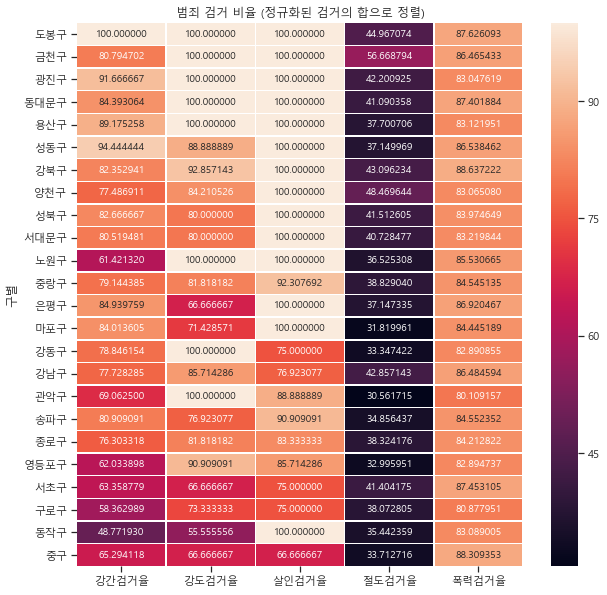

In [59]:
target_col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']

crime_anal_norm_sort = crime_anal_norm.sort_values(by="검거",ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_norm_sort[target_col],annot=True,fmt='f',linewidths=0.5)
plt.title("범죄 검거 비율 (정규화된 검거의 합으로 정렬)")
plt.show()

결과를 보면 절도 검거율은 다른 검거율에 비해 낮다는 것을 알 수 있다  
그리고 그래프의 하단으로 갈수록 검거율이 낮은데 그 중 강남3구중에서 '서초구'가 보인다  
전반적으로 검거율이 우수한 구는 도봉구 광진구 성동구로 보인다

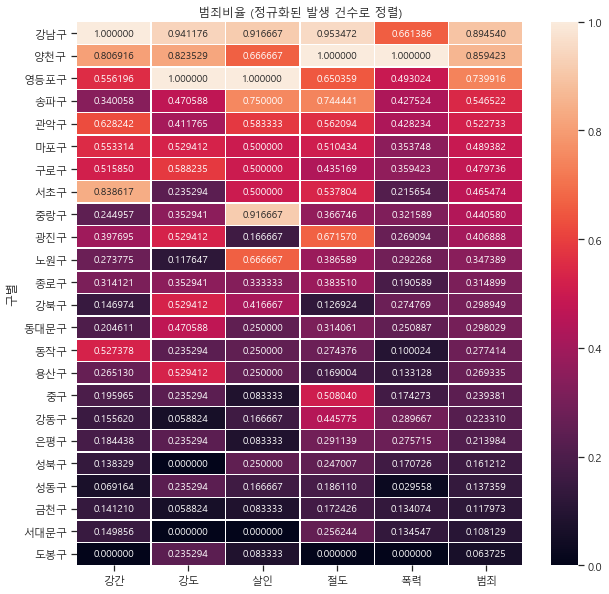

In [61]:
target_col = ["강간","강도","살인","절도","폭력","범죄"]

crime_anal_norm["범죄"] = crime_anal_norm["범죄"] / 5
crime_anal_norm_sort = crime_anal_norm.sort_values(by="범죄", ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_norm_sort[target_col],annot=True,fmt='f',linewidth=0.5)
plt.title("범죄비율 (정규화된 발생 건수로 정렬)")
plt.show()

이번에는 발생 건수의 합으로 정렬해서 heatmap으로 관찰해보았다  
발생 건수로 보니 강남구양천구 영등포구가 범죄 발생 건수가 높다   
그리고 송파구와 서초구도 낮다고 볼 수 없다  그렇다면 강남 3구가 안전하다고 할 수 있는지에 대한 의문이 생긴다

In [62]:
crime_anal_norm.to_csv("./data/02. crime_in_Seoul_final.csv",sep=',',encoding="utf-8")

일단 여기까지 하고 저장한다  
이제 우리는 새로운 시각화도구를 사용해보자  

## 2-9 지도 시각화 도구 - Foilum

지도를 가지고 뭔가 원하는 데이터를 표현할 수 있다는 것은 매력적인 일이다  
특히 지금처럼 강남 3구의 안전성을 이야기하면서 범죄율이나 검거율을 지도에 그릴 수 있다는 것은 더더욱 그렇다  
많은 지도 시각화 도구가 있지만 여기서는 Folium 라이브러리를 다루도록 하겠다  
먼저 pip install folium 으로 folium을 설치한다

In [64]:
import folium

먼저 folium을 import 한다

In [65]:
map_osm = folium.Map(location=[45.5236, -122.6750])
map_osm

그냥 위도와 경도 정보를 주면 지도를 그려준다    

In [66]:
stamen = folium.Map(location=[45.5236,-122.6750],zoom_start=13)
stamen

또한 zoom_start라는 옵션으로 확대 비율을 정의할 수도 있다

In [67]:
stamen = folium.Map(location=[45.5236,-122.6750],tiles='Stamen Toner',zoom_start=13)
stamen

tiles 옵션으로 위와 같은 모양의 지도도 만들 수 있다

In [69]:
map_2 = folium.Map(location=[45.5236,-122.6750],tiles='Stamen Toner',zoom_start=13)
folium.Marker([45.5244,-122.6699],popup='The Waterfront').add_to(map_2)
folium.CircleMarker([45.5215,-122.6261],radius=50,
                    popup='Laurelhurst Park', color='#3186cc',
                    fill_color='#3186cc').add_to(map_2)
map_2

이번에는 지도를 그리고 그 상태에서 원하는 좌표(위도, 경도)에 Marker 명령으로 마크를 찍을 수 있다  
그리고 CircleMarker 명령으로 반경(radius)과 색상(color)을 지정하면 원을 그려준다  

In [70]:
import folium
import pandas as pd

In [72]:
state_unemployment = './data/02. folium_US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(state_unemployment)
state_data.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


GitHub의 https://github.com/PinkWink/DataScience/tree/master/data 에 가면 위의 데이터를 받을 수 있다  
02.folium_US_Unemployment_Oct2012.csv 라는 파일에는 2012년 10월 기준 미국의 주별 실업률이 나와있다  
이것을 지도에 시각화하려고 한다  
역시 02. folium_us-states.json이라는 json 파일이 필요하다

.json 파일에는 id로 주별 고유 ID, 그리고 주 이름 등의 좌표가 있다  
특히 지도를 그리기 위해 주 경계선을 일일이 위도 경도 좌표가 입력되어 있어서 그걸 따라 선을 그리면 주 경계선이 된다

In [75]:
state_geo = './data/02. folium_us-states.json'

map = folium.Map(location=[40,-98], zoom_start=4)
map.choropleth(geo_data=state_geo,data=state_data,
               columns=['State','Unemployment'],
               key_on='feature.id',
               fill_color='YlGn',
               legend_name='Unemployment Rate (%)')
map

state_geo라는 변수에 json 파일 경로를 담고, folium에서 choropleth 명령으로 json 파일과 지도에  
표현하고 싶은 데이터를 입력하고, key_on 옵션으로 지도의 id를 알려주면 된다  
여기서 지도의 id가 서로 중복되지 않아야 한다  
그렇게 그리면 위 그림처럼 실업률이 colormap으로 표현된 결과를 얻을 수 있다

## 2-10 서울시 범죄율에 대한 지도 시각화

이제 지도를 다루는 법도 알았으니 우리가 열심히 다듬은 자료를 시각화해보자  
물론 언제나 난관은 있다  
앞의 그림처럼 서울시 구별 경계를 그릴 수 있는 json 파일이 있어야한다  
다행히 GitHub에서 e9t라는 아이디로 활동하는 Lucy Park 님이 있다  
https://github.com/southkorea/southkorea-maps 에 방문하면 한국 지도에 대해 json 파일을 얻을 수 있다  

In [76]:
import json
get_path = './data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(get_path, encoding='utf-8'))

먼저 json 파일을 로딩한다

In [78]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
map.choropleth(geo_data = geo_str, data = crime_anal_norm['살인'],
               columns = [crime_anal_norm.index, crime_anal_norm['살인']],
               fill_color = 'PuRd',
               key_on = 'feature.id')
map

그리고 서울시의 중심의 위도와 경도 정보를 먼저 입력하고 경계선을 그리는데, 컬러맵은 살인 발생 건수로 지정한다  
그 결과를 보면 살인 발생 건수에서 강남 구가 안전하다고 보기는 어려울 것 같다

In [79]:
map = folium.Map(location=[37.5502,126.982], zoom_start=11,tiles='Stamen Toner')
map.choropleth(geo_data=geo_str,
               data=crime_anal_norm['강간'],
               columns=[crime_anal_norm.index, crime_anal_norm['강간']],
               fill_color = 'PuRd',
               key_on = 'feature.id')
map

특기 강간 발생 건수로 그러보면, 더더욱 강남 3구가 안전한지 의심이 든다  

In [82]:
map = folium.Map(location=[37.5502,126.982],zoom_start=11,tiles='Stamen Toner')
map.choropleth(geo_data=geo_str,
               data=crime_anal_norm['범죄'],
               columns=[crime_anal_norm.index,crime_anal_norm['범죄']],
               fill_color = 'PuRd',
               key_on='feature.id')
map

역시 강남 3구와 강서구 주변이 범죄 발생 건수가 높은 것으로 나타나고 있다  
그러나 인구수를 고려해야 한다.  즉 인구 대비 범죄 발생 비율을 한번 알아보자  
범죄 전체 발생건수에 인구수를 나누고 소수점 밑으로 가서 적절한 값을 곱해보자

In [84]:
tmp_criminal = crime_anal_norm['살인'] / crime_anal_norm['인구수'] * 1000000

map = folium.Map(location=[37.5502,126.982],zoom_start=11,tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data = tmp_criminal,
               columns = [crime_anal.index, tmp_criminal],
               fill_color = 'PuRd',
               key_on='feature.id')
map

해당 결과를 보면 위와 같다  
인구 대비 범죄 발생 건수로 보면 강남 3구가 1위는 아니지만 안전도가 제일 높다고는 말할 수 없을 것 같다  
그런데 중구와 종로구의 범죄율이 엄청 높아진 것을 확인 가능하다  
아마 거주 인구는 적고, 관광지여서 그런게 아닐지 추측해 볼 수 있다

## 2-11 서울시 경찰서별 검거율과 구별 범죄 발생율을 동시에 시각화하기

이 부분은 현재 유료로 전환된 googlemap 이 필요한 파트이므로 넘어간다  
2장 **-끝-**